w[0]: 0.393906  b: -0.031804


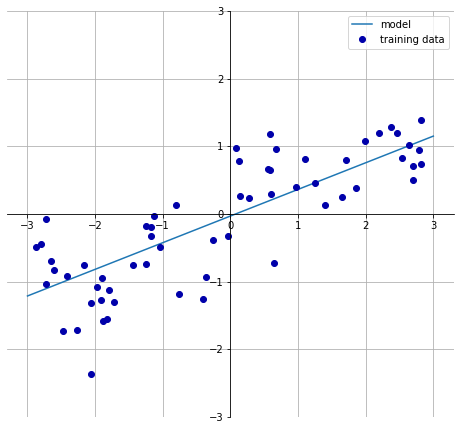

In [1]:
# Modèles linéaires
import mglearn
mglearn.plots.plot_linear_regression_wave()

In [2]:
# Méthode des moindres carrés ordinaires
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_ : {}".format(lr.coef_))
print("lr.intercept_ : {}".format(lr.intercept_))

lr.coef_ : [0.39390555]
lr.intercept_ : -0.031804343026759746


In [3]:
print("Training set score : {}".format(lr.score(X_train, y_train)))
print("Test set score : {}".format(lr.score(X_test, y_test)))

Training set score : 0.6700890315075756
Test set score : 0.65933685968637


In [4]:
# Avec un jeu de données plus conséquents
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score : {}".format(lr.score(X_train, y_train)))
print("Test set score : {}".format(lr.score(X_test, y_test)))

Training set score : 0.9520519609032727
Test set score : 0.6074721959665943


In [5]:
# Il y a un surapprentissage essayons avec la "régression ridge"
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score : {}".format(ridge.score(X_train, y_train)))
print("Test set score : {}".format(ridge.score(X_test, y_test)))

Training set score : 0.8857966585170941
Test set score : 0.7527683481744749


In [7]:
# Essayons maintenant d'augmenter la valeur d'Alpha
# Plus elle est élevée et plus le modèle est restreint

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score : {}".format(ridge10.score(X_train, y_train)))
print("Test set score : {}".format(ridge10.score(X_test, y_test)))

Training set score : 0.7882787115369614
Test set score : 0.6359411489177311


In [13]:
# Essayons maintenant de baisser la valeur d'alpha

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score : {}".format(ridge01.score(X_train, y_train)))
print("Test set score : {}".format(ridge01.score(X_test, y_test)))

Training set score : 0.9282273685001986
Test set score : 0.7722067936479653


In [9]:
# Et maintenant avec alpha = 0

ridge0 = Ridge(alpha=0).fit(X_train, y_train)
print("Training set score : {}".format(ridge0.score(X_train, y_train)))
print("Test set score : {}".format(ridge0.score(X_test, y_test)))

# On retrouve exactement le même résultat qu'avec le modèle LinearRegression

Training set score : 0.9519587084114596
Test set score : 0.6079440015388644


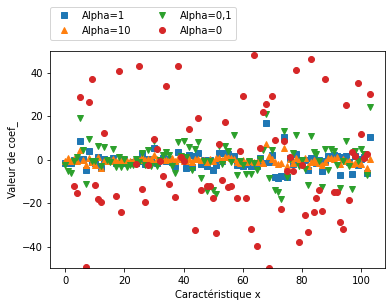

In [38]:
# Maintenant comparons les valeurs du coefficient directeur
import matplotlib.pyplot as plt
plt.plot(ridge.coef_, 's', label="Alpha=1")
plt.plot(ridge10.coef_, '^', label="Alpha=10")
plt.plot(ridge01.coef_, 'v', label="Alpha=0,1")
plt.plot(lr.coef_, 'o', label="Alpha=0")

plt.xlabel("Caractéristique x")
plt.ylabel("Valeur de coef_")
xlims= plt.xlim()
plt.xlim(xlims)
plt.ylim(-50, 50)
plt.legend(ncol=2, loc=(0,1.05))

# on observe donc que plus alpha se rapproche de 0 plus le coefficient
# est important
# et inversement

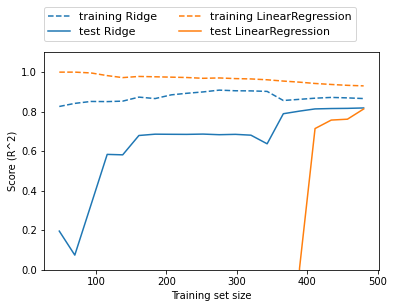

In [21]:
# Performannce des modèles en fonction du nombre d'échantillons
mglearn.plots.plot_ridge_n_samples()

In [24]:
# Modèle lasso pour alpha = 1 
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("Training set score : {}".format(lasso.score(X_train, y_train)))
print("Test set score : {}".format(lasso.score(X_test, y_test)))
print(f"Number of features used : {np.sum(lasso.coef_!=0)}")

Training set score : 0.29323768991114607
Test set score : 0.20937503255272294
Number of features used : 4


In [29]:
# Essayons de baisser la valeur d'alpha
lasso0006 = Lasso(alpha=0.006, max_iter=100000).fit(X_train, y_train)
print("Training set score : {}".format(lasso0006.score(X_train, y_train)))
print("Test set score : {}".format(lasso0006.score(X_test, y_test)))
print(f"Number of features used : {np.sum(lasso0006.coef_!=0)}")

Training set score : 0.9117577707290412
Test set score : 0.7786339243580236
Number of features used : 40


In [31]:
# Essayons de baisser encore plus la valeur d'alpha
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score : {}".format(lasso00001.score(X_train, y_train)))
print("Test set score : {}".format(lasso00001.score(X_test, y_test)))
print(f"Number of features used : {np.sum(lasso00001.coef_!=0)}")

Training set score : 0.9507158754515463
Test set score : 0.6437467421272821
Number of features used : 96


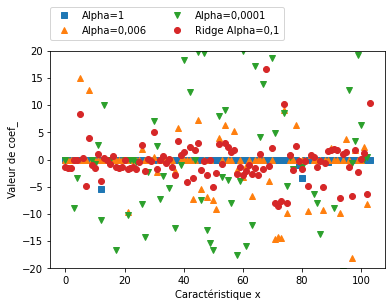

In [37]:
# Comparons de nouveau les valeurs de coef_

plt.plot(lasso.coef_, 's', label="Alpha=1")""
plt.plot(lasso0006.coef_, '^', label="Alpha=0,006")
plt.plot(lasso00001.coef_, 'v', label="Alpha=0,0001")
plt.plot(ridge.coef_, 'o', label="Ridge Alpha=0,1")

plt.xlabel("Caractéristique x")
plt.ylabel("Valeur de coef_")
xlims= plt.xlim()
plt.xlim(xlims)
plt.ylim(-20, 20)
plt.legend(ncol=2, loc=(0,1.05))

# La grande majorité des coefficients pour alpha = 1 sont nuls
# Car comme vu au dessus seulement 4 coefs ne sont pas égaux à 0

Set score : 0.9230769230769231
Set score : 0.9615384615384616


c:\users\sdf07\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
c:\users\sdf07\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


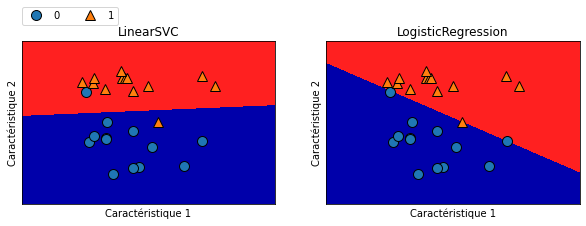

In [60]:
# linearSVC et LogisisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression(C=1000.000000)], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, ax=ax)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Caractéristique 1")
    ax.set_ylabel("Caractéristique 2")
    print("Set score : {}".format(clf.score(X, y)))
axes[0].legend(ncol=2, loc=(0,1.1))

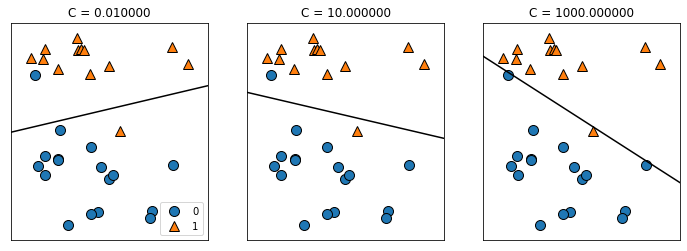

In [48]:
# Le paramètre C de ces deux modèles

mglearn.plots.plot_linear_svc_regularization()

# Plus c est élevé et moins il y a de régulasrisation

In [68]:
# Avec le jeu de données cancer
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   stratify=cancer.target, random_state=42)
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [72]:
# Précision pour C=1
logreg = LogisticRegression(max_iter=10000).fit(X_train, y_train)
print("Training set score : {}".format(logreg.score(X_train, y_train)))
print("Test set score : {}".format(logreg.score(X_test, y_test)))

Training set score : 0.9577464788732394
Test set score : 0.958041958041958


In [73]:
# Précision pour C=100
logreg100 = LogisticRegression(max_iter=10000, C=100).fit(X_train, y_train)
print("Training set score : {}".format(logreg100.score(X_train, y_train)))
print("Test set score : {}".format(logreg100.score(X_test, y_test)))

Training set score : 0.9812206572769953
Test set score : 0.972027972027972


In [74]:
# Précision pour C=0,01
logreg001 = LogisticRegression(max_iter=10000, C=0.01).fit(X_train, y_train)
print("Training set score : {}".format(logreg001.score(X_train, y_train)))
print("Test set score : {}".format(logreg001.score(X_test, y_test)))

Training set score : 0.9530516431924883
Test set score : 0.951048951048951


In [75]:
cancer.data.shape

(569, 30)

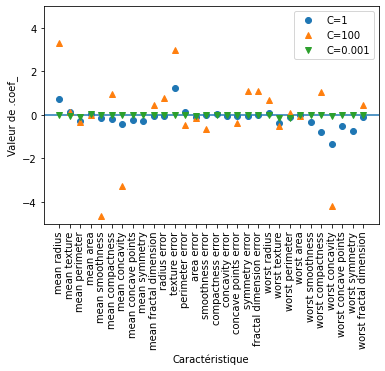

In [83]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Caractéristique")
plt.ylabel("Valeur de .coef_")
plt.legend()

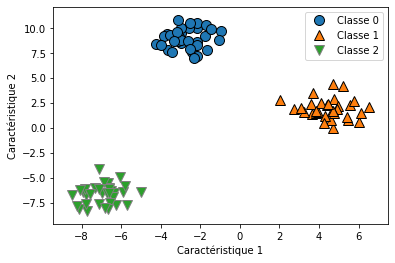

In [113]:
# Modèle linéaire pour une classification multiclasse
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Caractéristique 1")
plt.ylabel("Caractéristique 2")
name = ["Classe 0", "Classe 1", "Classe 2"]
plt.legend(name)

In [114]:
X.shape

(100, 2)

In [115]:
np.unique(y)

array([0, 1, 2])

In [116]:
linear_svm = LinearSVC().fit(X, y)
print(f"Coefficient shape : {linear_svm.coef_.shape}")
print(f"Intercet shape : {linear_svm.intercept_.shape}")

Coefficient shape : (3, 2)
Intercet shape : (3,)


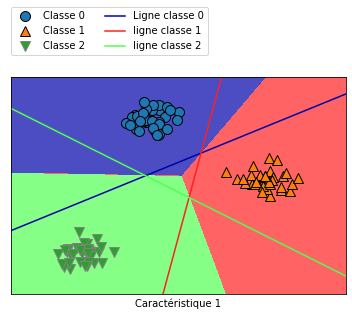

In [122]:
# Frontières de décision
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.xlabel("Caractéristique 0")
plt.xlabel("Caractéristique 1")
name = ["Classe 0", "Classe 1", "Classe 2", "Ligne classe 0", "ligne classe 1", "ligne classe 2"]
plt.legend(name, ncol=2, loc=(0,1.1))